# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [15]:
pip install yellowbrick


     -------------------------------------- 282.6/282.6 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
from sklearn import cluster, datasets
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns


In [11]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [4]:
kmeans=KMeans(n_clusters=8)

In [5]:
clusters = kmeans.fit(X)

c:\Users\Carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
len(clusters.cluster_centers_)

8

In [8]:
labels = clusters.predict(X)

In [11]:
score = silhouette_score(X, labels)
score

0.5398971441034115

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [12]:
kmeans=KMeans(n_clusters=5)
clusters = kmeans.fit(X)
labels = clusters.predict(X)
score = silhouette_score(X, labels)
print("Silhouette score:", score)


c:\Users\Carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.5489993239795675


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [13]:
kmeans=KMeans(n_clusters=3)
clusters = kmeans.fit(X)
labels = clusters.predict(X)
score = silhouette_score(X, labels)
print("Silhouette score:", score)

c:\Users\Carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.5711381937868838


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [5]:
from yellowbrick.cluster import KElbowVisualizer

In [18]:
clusters = kmeans.fit(X)

c:\Users\Carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1]:
range_n_clusters = range(2, 11)

In [9]:
from sklearn.cluster import KMeans
model = KMeans()

c:\Users\Carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

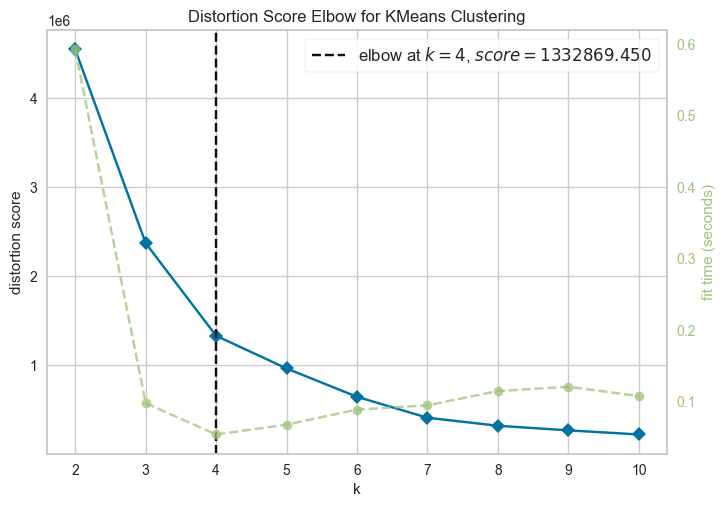

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
visualizer = KElbowVisualizer(model, k=range_n_clusters, metric='distortion')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()         # Show the plot

c:\Users\Carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

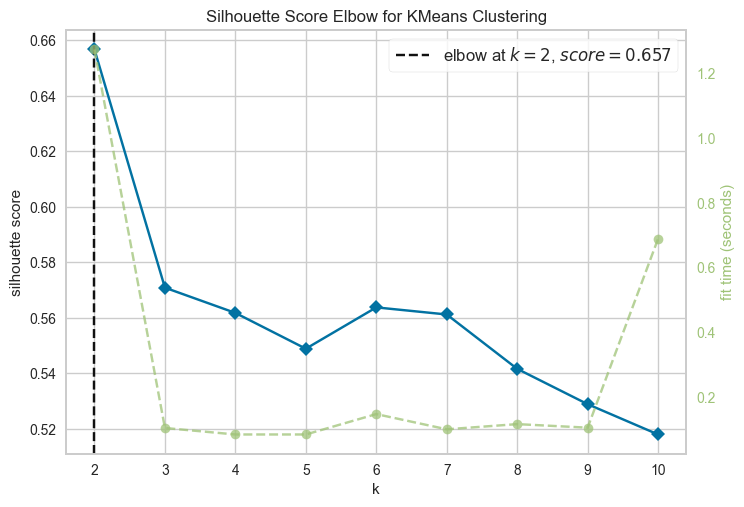

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [14]:
visualizer = KElbowVisualizer(model, k=range_n_clusters, metric='silhouette')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()         # Show the plot

In [16]:
visualizer = KElbowVisualizer(model, k=range_n_clusters, metric='calinski_harabaz')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()         # Show the plot

YellowbrickValueError: '{}' is not a defined metric use one of distortion, silhouette, or calinski_harabasz

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

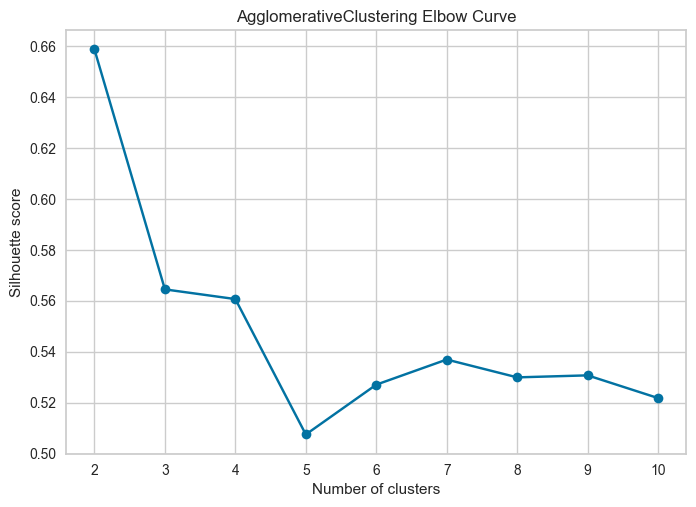

In [27]:
agg_scores = []
for k in range(2, 11):
    agg_model = AgglomerativeClustering(n_clusters=k)
    agg_model.fit(X)
    agg_score = silhouette_score(X, agg_model.labels_)
    agg_scores.append(agg_score)
plt.plot(range(2, 11), agg_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('AgglomerativeClustering Elbow Curve')
plt.show()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [12]:
k = 8
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# Add the cluster labels as a new column to the dataframe
X['cluster'] = kmeans_model.labels_

# Create a scatter matrix for the data, colored by cluster
sns.pairplot(X, hue='cluster', palette='bright')
plt.show()


c:\Users\Carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000024D73218D30> (for post_execute):


KeyboardInterrupt: 

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.